In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score

In [61]:
cancer = load_breast_cancer(as_frame=True)

In [62]:
X_data = cancer["data"]
y_data = cancer["target"]

In [63]:
X_data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
y_data.unique()

array([0, 1])

In [66]:
X_dev, X_test, y_dev, y_test = train_test_split(X_data,y_data,random_state=42, test_size=0.2)

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev,random_state=42, test_size=0.2)

In [68]:
def dnn(n_features, n_output):
    input_lag = tf.keras.layers.Input(shape=(n_features,1))
    skjult_lag = tf.keras.layers.Dense(n_features*2, activation='relu')(input_lag)
    flatten = tf.keras.layers.Flatten()(skjult_lag)
    output_lag = tf.keras.layers.Dense(n_output, activation='sigmoid')(flatten)
    modell = tf.keras.models.Model(inputs=input_lag, outputs=output_lag)
    return modell

In [69]:
model = dnn(X_train.shape[1],1)

In [70]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30, 60)              │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │           1,801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [76]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30, 60)              │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │           1,801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
y_train.shape

(364,)

In [73]:
np.expand_dims(y_train,-1).shape

(364, 1)

In [ ]:
history = model.fit(x=X_train,y=y_train, epochs=1000, batch_size=10, validation_data=(X_val,np.expand_dims(y_val,-1)))

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - auc_4: 0.7330 - binary_accuracy: 0.5277 - loss: 2.3175 - val_auc_4: 0.7899 - val_binary_accuracy: 0.5385 - val_loss: 0.8573
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - auc_4: 0.8105 - binary_accuracy: 0.6746 - loss: 0.8318 - val_auc_4: 0.7798 - val_binary_accuracy: 0.7582 - val_loss: 0.7029
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.8290 - binary_accuracy: 0.8050 - loss: 0.5798 - val_auc_4: 0.8056 - val_binary_accuracy: 0.7363 - val_loss: 0.6380
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - auc_4: 0.8685 - binary_accuracy: 0.7976 - loss: 0.4964 - val_auc_4: 0.8697 - val_binary_accuracy: 0.6154 - val_loss: 0.7146
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - auc_4: 0.8590 - binary_accuracy: 0.8241 - loss: 0.5489 - val_auc_4: 0.8235 - val_binary_accuracy: 0.8462 - val_loss: 0.5200
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - auc_4: 0.8422 - binary_accuracy: 0.8566 - loss: 0.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9461 - binary_accuracy: 0.9016 - loss: 0.2519 - val_auc_4: 0.9659 - val_binary_accuracy: 0.8901 - val_loss: 0.2305
Epoch 40/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9315 - binary_accuracy: 0.8857 - loss: 0.2842 - val_auc_4: 0.9669 - val_binary_accuracy: 0.8901 - val_loss: 0.2265
Epoch 41/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9356 - binary_accuracy: 0.9245 - loss: 0.2576 - val_auc_4: 0.9609 - val_binary_accuracy: 0.9121 - val_loss: 0.2597
Epoch 42/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9390 - binary_accuracy: 0.9204 - loss: 0.2480 - val_auc_4: 0.9705 - val_binary_accuracy: 0.9341 - val_loss: 0.2336
Epoch 43/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9614 - binary_accuracy: 0.9140 - loss: 0.2180 - val_auc_4: 0.9664 - val_binary_accuracy: 0.8901 - val_loss: 0.2248
Epoch 44/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9548 - binary_accuracy: 0.9207 - loss: 0.2212 - v

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9703 - binary_accuracy: 0.9105 - loss: 0.2101 - val_auc_4: 0.9717 - val_binary_accuracy: 0.9121 - val_loss: 0.2136
Epoch 78/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9519 - binary_accuracy: 0.8959 - loss: 0.2436 - val_auc_4: 0.9768 - val_binary_accuracy: 0.9121 - val_loss: 0.1849
Epoch 79/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9562 - binary_accuracy: 0.9089 - loss: 0.2322 - val_auc_4: 0.9770 - val_binary_accuracy: 0.9231 - val_loss: 0.1840
Epoch 80/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9619 - binary_accuracy: 0.9217 - loss: 0.2155 - val_auc_4: 0.9765 - val_binary_accuracy: 0.9121 - val_loss: 0.1839
Epoch 81/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9719 - binary_accuracy: 0.9302 - loss: 0.1865 - val_auc_4: 0.9783 - val_binary_accuracy: 0.9341 - val_loss: 0.1898
Epoch 82/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9683 - binary_accuracy: 0.9285 - loss: 0.2033 - va

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9787 - binary_accuracy: 0.9438 - loss: 0.1618 - val_auc_4: 0.9801 - val_binary_accuracy: 0.9341 - val_loss: 0.1695
Epoch 116/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9725 - binary_accuracy: 0.9245 - loss: 0.1955 - val_auc_4: 0.9811 - val_binary_accuracy: 0.9451 - val_loss: 0.1643
Epoch 117/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9831 - binary_accuracy: 0.9252 - loss: 0.1788 - val_auc_4: 0.9795 - val_binary_accuracy: 0.9341 - val_loss: 0.1756
Epoch 118/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9808 - binary_accuracy: 0.9214 - loss: 0.1805 - val_auc_4: 0.9816 - val_binary_accuracy: 0.9451 - val_loss: 0.1634
Epoch 119/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc_4: 0.9783 - binary_accuracy: 0.9349 - loss: 0.1660 - val_auc_4: 0.9788 - val_binary_accuracy: 0.9121 - val_loss: 0.2017
Epoch 120/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9593 - binary_accuracy: 0.8993 - loss: 0.2408 -

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9788 - binary_accuracy: 0.9326 - loss: 0.1783 - val_auc_4: 0.9818 - val_binary_accuracy: 0.9451 - val_loss: 0.1548
Epoch 154/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9861 - binary_accuracy: 0.9405 - loss: 0.1497 - val_auc_4: 0.9790 - val_binary_accuracy: 0.9231 - val_loss: 0.1897
Epoch 155/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9807 - binary_accuracy: 0.9437 - loss: 0.1589 - val_auc_4: 0.9826 - val_binary_accuracy: 0.9560 - val_loss: 0.1530
Epoch 156/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - auc_4: 0.9718 - binary_accuracy: 0.9080 - loss: 0.2086 - val_auc_4: 0.9823 - val_binary_accuracy: 0.9451 - val_loss: 0.1541
Epoch 157/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9849 - binary_accuracy: 0.9396 - loss: 0.1493 - val_auc_4: 0.9848 - val_binary_accuracy: 0.9121 - val_loss: 0.2019
Epoch 158/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9744 - binary_accuracy: 0.8999 - loss: 0.2150

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9859 - binary_accuracy: 0.9460 - loss: 0.1509 - val_auc_4: 0.9841 - val_binary_accuracy: 0.9560 - val_loss: 0.1464
Epoch 192/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9723 - binary_accuracy: 0.8963 - loss: 0.2048 - val_auc_4: 0.9848 - val_binary_accuracy: 0.9451 - val_loss: 0.1498
Epoch 193/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9858 - binary_accuracy: 0.9492 - loss: 0.1470 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9341 - val_loss: 0.1597
Epoch 194/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc_4: 0.9842 - binary_accuracy: 0.9417 - loss: 0.1583 - val_auc_4: 0.9831 - val_binary_accuracy: 0.9341 - val_loss: 0.1544
Epoch 195/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc_4: 0.9869 - binary_accuracy: 0.9555 - loss: 0.1293 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9121 - val_loss: 0.1696
Epoch 196/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9543 - binary_accuracy: 0.9131 - loss: 0.1833 -

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc_4: 0.9841 - binary_accuracy: 0.9177 - loss: 0.1612 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9451 - val_loss: 0.1436
Epoch 230/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9917 - binary_accuracy: 0.9658 - loss: 0.1226 - val_auc_4: 0.9846 - val_binary_accuracy: 0.9451 - val_loss: 0.1497
Epoch 231/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9867 - binary_accuracy: 0.9286 - loss: 0.1410 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9451 - val_loss: 0.1470
Epoch 232/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9884 - binary_accuracy: 0.9343 - loss: 0.1493 - val_auc_4: 0.9846 - val_binary_accuracy: 0.9341 - val_loss: 0.1550
Epoch 233/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc_4: 0.9846 - binary_accuracy: 0.9132 - loss: 0.1696 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9231 - val_loss: 0.1586
Epoch 234/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9860 - binary_accuracy: 0.9379 - loss: 0.1411 

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9928 - binary_accuracy: 0.9660 - loss: 0.1114 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9341 - val_loss: 0.1508
Epoch 268/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc_4: 0.9907 - binary_accuracy: 0.9417 - loss: 0.1270 - val_auc_4: 0.9854 - val_binary_accuracy: 0.9341 - val_loss: 0.1523
Epoch 269/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9828 - binary_accuracy: 0.9487 - loss: 0.1474 - val_auc_4: 0.9861 - val_binary_accuracy: 0.9451 - val_loss: 0.1404
Epoch 270/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9901 - binary_accuracy: 0.9475 - loss: 0.1277 - val_auc_4: 0.9848 - val_binary_accuracy: 0.9341 - val_loss: 0.1489
Epoch 271/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9919 - binary_accuracy: 0.9548 - loss: 0.1325 - val_auc_4: 0.9854 - val_binary_accuracy: 0.9560 - val_loss: 0.1428
Epoch 272/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9913 - binary_accuracy: 0.9450 - loss: 0.1265

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9877 - binary_accuracy: 0.9328 - loss: 0.1482 - val_auc_4: 0.9861 - val_binary_accuracy: 0.9451 - val_loss: 0.1356
Epoch 306/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9913 - binary_accuracy: 0.9355 - loss: 0.1483 - val_auc_4: 0.9861 - val_binary_accuracy: 0.9451 - val_loss: 0.1371
Epoch 307/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9938 - binary_accuracy: 0.9394 - loss: 0.1198 - val_auc_4: 0.9861 - val_binary_accuracy: 0.9560 - val_loss: 0.1374
Epoch 308/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9912 - binary_accuracy: 0.9447 - loss: 0.1339 - val_auc_4: 0.9864 - val_binary_accuracy: 0.9670 - val_loss: 0.1400
Epoch 309/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9856 - binary_accuracy: 0.9416 - loss: 0.1448 - val_auc_4: 0.9861 - val_binary_accuracy: 0.9451 - val_loss: 0.1382
Epoch 310/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9924 - binary_accuracy: 0.9602 - loss: 0.120

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc_4: 0.9954 - binary_accuracy: 0.9593 - loss: 0.1089 - val_auc_4: 0.9859 - val_binary_accuracy: 0.9451 - val_loss: 0.1333
Epoch 344/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9947 - binary_accuracy: 0.9671 - loss: 0.1026 - val_auc_4: 0.9848 - val_binary_accuracy: 0.9231 - val_loss: 0.1926
Epoch 345/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9902 - binary_accuracy: 0.9338 - loss: 0.1608 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9341 - val_loss: 0.1406
Epoch 346/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9895 - binary_accuracy: 0.9365 - loss: 0.1249 - val_auc_4: 0.9846 - val_binary_accuracy: 0.9341 - val_loss: 0.1485
Epoch 347/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9920 - binary_accuracy: 0.9570 - loss: 0.1135 - val_auc_4: 0.9864 - val_binary_accuracy: 0.9670 - val_loss: 0.1372
Epoch 348/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9900 - binary_accuracy: 0.9470 - loss: 0.1300 

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9941 - binary_accuracy: 0.9559 - loss: 0.1208 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9231 - val_loss: 0.1789
Epoch 382/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9934 - binary_accuracy: 0.9569 - loss: 0.1107 - val_auc_4: 0.9848 - val_binary_accuracy: 0.9231 - val_loss: 0.1973
Epoch 383/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9855 - binary_accuracy: 0.9313 - loss: 0.1596 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9341 - val_loss: 0.1398
Epoch 384/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9920 - binary_accuracy: 0.9449 - loss: 0.1269 - val_auc_4: 0.9859 - val_binary_accuracy: 0.9451 - val_loss: 0.1319
Epoch 385/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9930 - binary_accuracy: 0.9583 - loss: 0.0978 - val_auc_4: 0.9856 - val_binary_accuracy: 0.9341 - val_loss: 0.1416
Epoch 386/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9922 - binary_accuracy: 0.9449 - loss: 0.1188

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc_4: 0.9931 - binary_accuracy: 0.9474 - loss: 0.1032 - val_auc_4: 0.9836 - val_binary_accuracy: 0.9341 - val_loss: 0.1482
Epoch 534/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9946 - binary_accuracy: 0.9600 - loss: 0.1010 - val_auc_4: 0.9838 - val_binary_accuracy: 0.9341 - val_loss: 0.1452
Epoch 535/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9920 - binary_accuracy: 0.9633 - loss: 0.1177 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9341 - val_loss: 0.1339
Epoch 536/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9950 - binary_accuracy: 0.9566 - loss: 0.0981 - val_auc_4: 0.9846 - val_binary_accuracy: 0.9341 - val_loss: 0.1346
Epoch 537/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9916 - binary_accuracy: 0.9411 - loss: 0.1201 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9560 - val_loss: 0.1617
Epoch 538/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc_4: 0.9873 - binary_accuracy: 0.9452 - loss: 0.1416

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9974 - binary_accuracy: 0.9740 - loss: 0.0714 - val_auc_4: 0.9854 - val_binary_accuracy: 0.9670 - val_loss: 0.1347
Epoch 572/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc_4: 0.9964 - binary_accuracy: 0.9671 - loss: 0.0881 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9451 - val_loss: 0.1303
Epoch 573/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc_4: 0.9954 - binary_accuracy: 0.9658 - loss: 0.1003 - val_auc_4: 0.9841 - val_binary_accuracy: 0.9341 - val_loss: 0.1471
Epoch 574/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc_4: 0.9913 - binary_accuracy: 0.9350 - loss: 0.1359 - val_auc_4: 0.9838 - val_binary_accuracy: 0.9341 - val_loss: 0.1664
Epoch 575/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc_4: 0.9940 - binary_accuracy: 0.9627 - loss: 0.1143 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9231 - val_loss: 0.1998
Epoch 576/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc_4: 0.9939 - binary_accuracy: 0.9690 - loss: 0.1085 

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc_4: 0.9888 - binary_accuracy: 0.9263 - loss: 0.1316 - val_auc_4: 0.9841 - val_binary_accuracy: 0.9341 - val_loss: 0.1427
Epoch 610/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc_4: 0.9671 - binary_accuracy: 0.9482 - loss: 0.1105 - val_auc_4: 0.9841 - val_binary_accuracy: 0.9341 - val_loss: 0.1436
Epoch 611/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc_4: 0.9885 - binary_accuracy: 0.9243 - loss: 0.1394 - val_auc_4: 0.9851 - val_binary_accuracy: 0.9670 - val_loss: 0.1413
Epoch 612/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_4: 0.9959 - binary_accuracy: 0.9629 - loss: 0.0967 - val_auc_4: 0.9848 - val_binary_accuracy: 0.9560 - val_loss: 0.1313
Epoch 613/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc_4: 0.9956 - binary_accuracy: 0.9509 - loss: 0.0941 - val_auc_4: 0.9843 - val_binary_accuracy: 0.9451 - val_loss: 0.1346
Epoch 614/1000
27/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_4: 0.9971 - binary_accuracy: 0.9676 - loss: 0.0863 

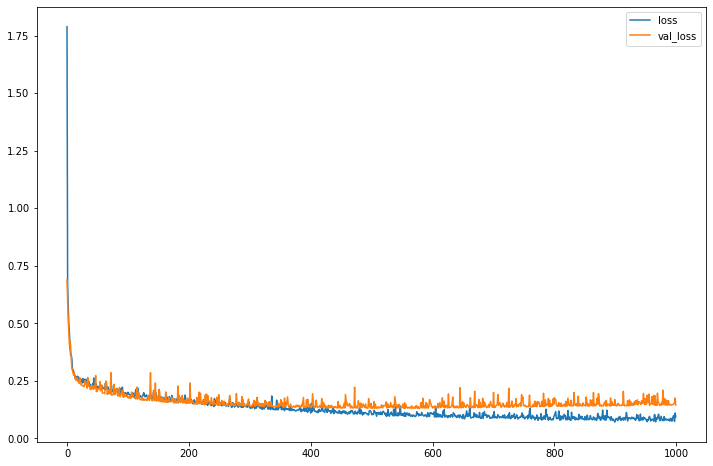

In [49]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

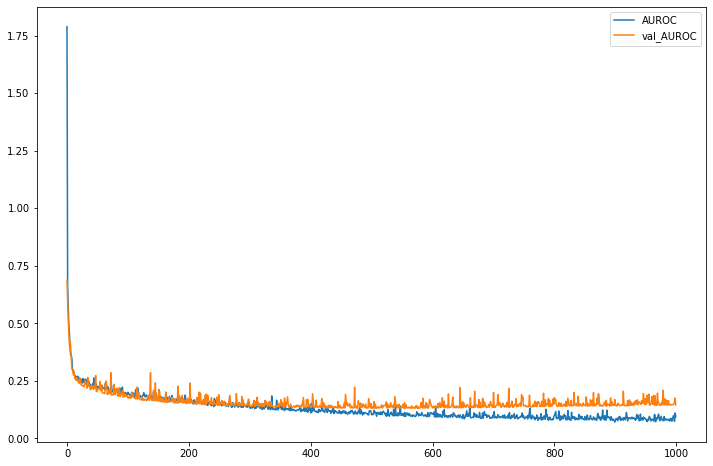

In [50]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()

In [51]:
y_test_hat = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [59]:
print("Nøyaktighet = ",accuracy_score(y_test,(y_test_hat>0.5)*1))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>0.5)*1).round(2))
print("F1-score = ",f1_score(y_test,(y_test_hat>0.5)*1).round(2))

Nøyaktighet =  0.956140350877193
Sensitivitet =  0.99
Spesifisitet =  0.91
Presisjon =  0.95
F1-score =  0.97


#### Resultater fra logistisk regresjon:
Nøyaktighet =  0.97

Sensitivitet =  0.98

Spesifisitet =  0.94

Presisjon =  0.97

F1-score =  0.97